## Librairies importation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read DDQL logs

In [2]:
main_path = "/path_to_fintech-capstone/log/execution/marketreplay/marketreplay_ddqn_train_"
days = list(range(13, 18)) + list(range(21, 25))
stats = {
    day: {
        file[:-4]: pd.read_pickle(os.path.join(
            main_path + "2dIV-NN1-1_train_IBM_2003-01-{}_BUY_10_300_600000".format(day), file
        ), compression="bz2")
        for file in sorted(os.listdir(main_path + "2dIV-NN1-1_train_IBM_2003-01-{}_BUY_10_300_600000".format(day)))
    } for day in days
}

## Plot graphs

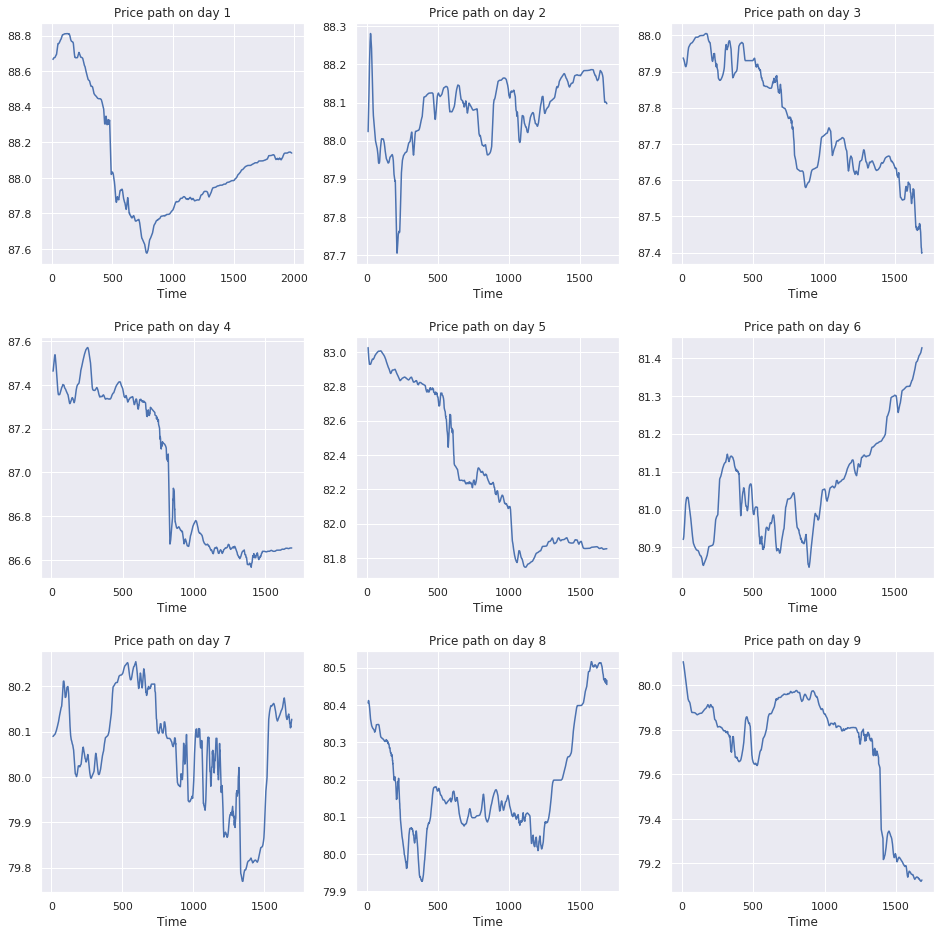

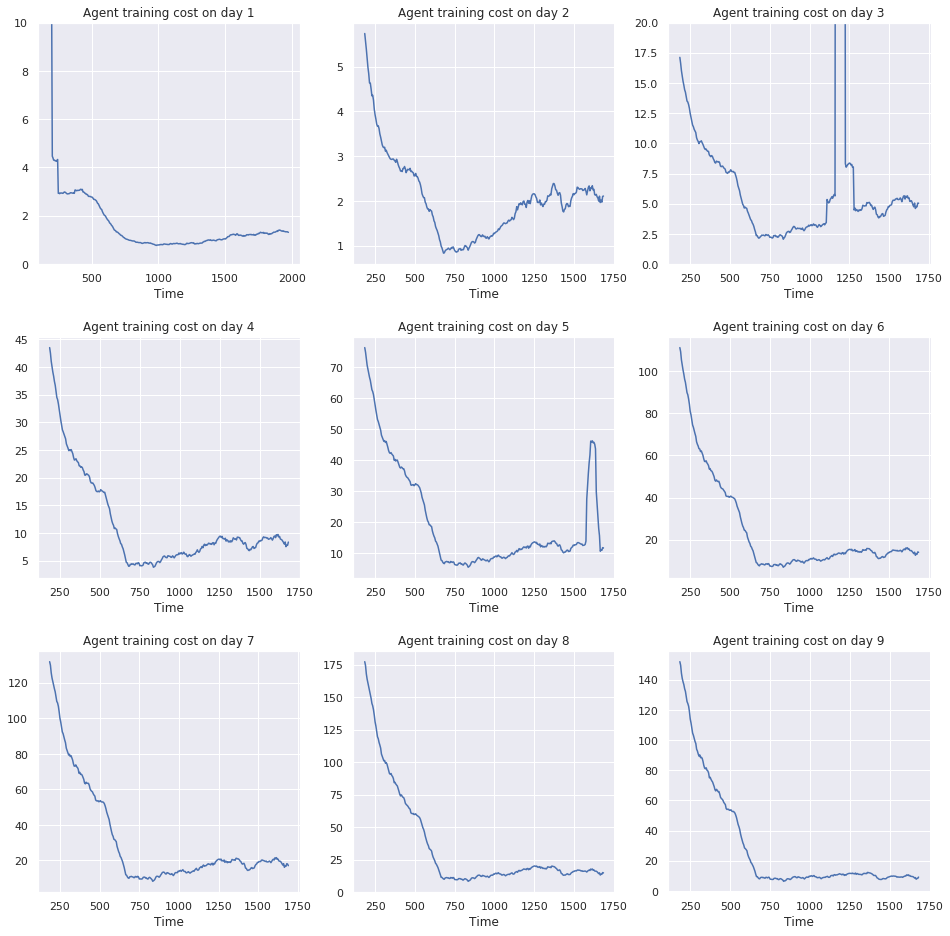

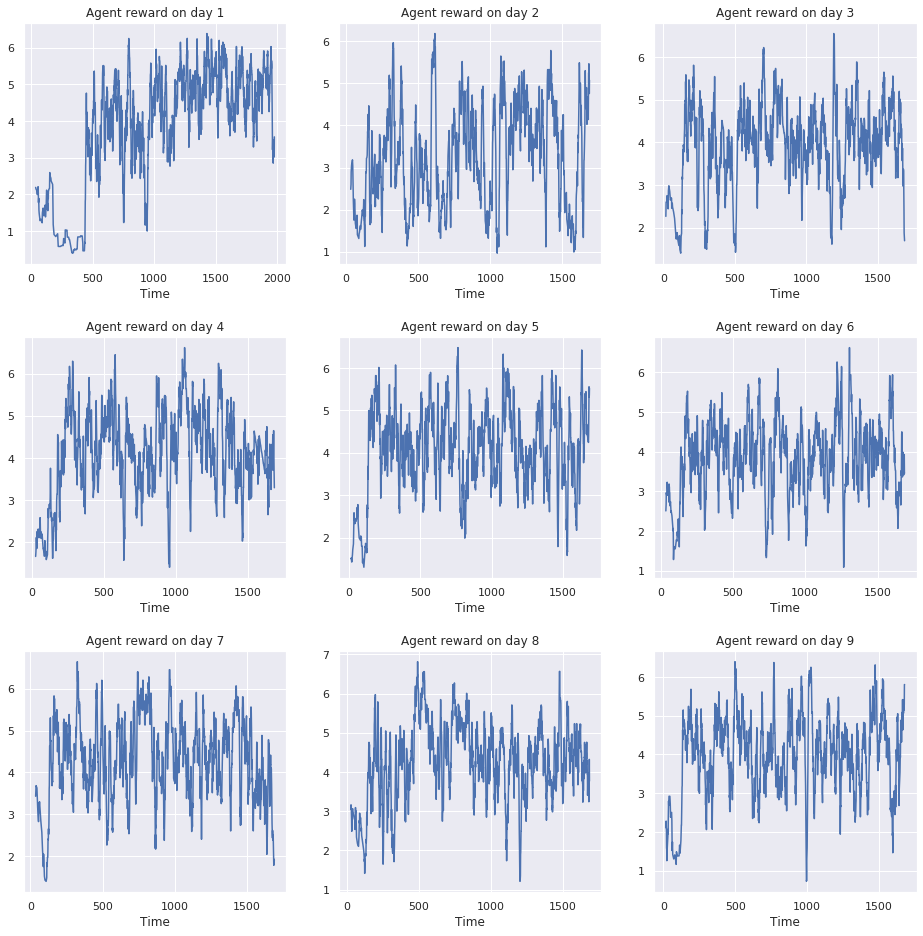

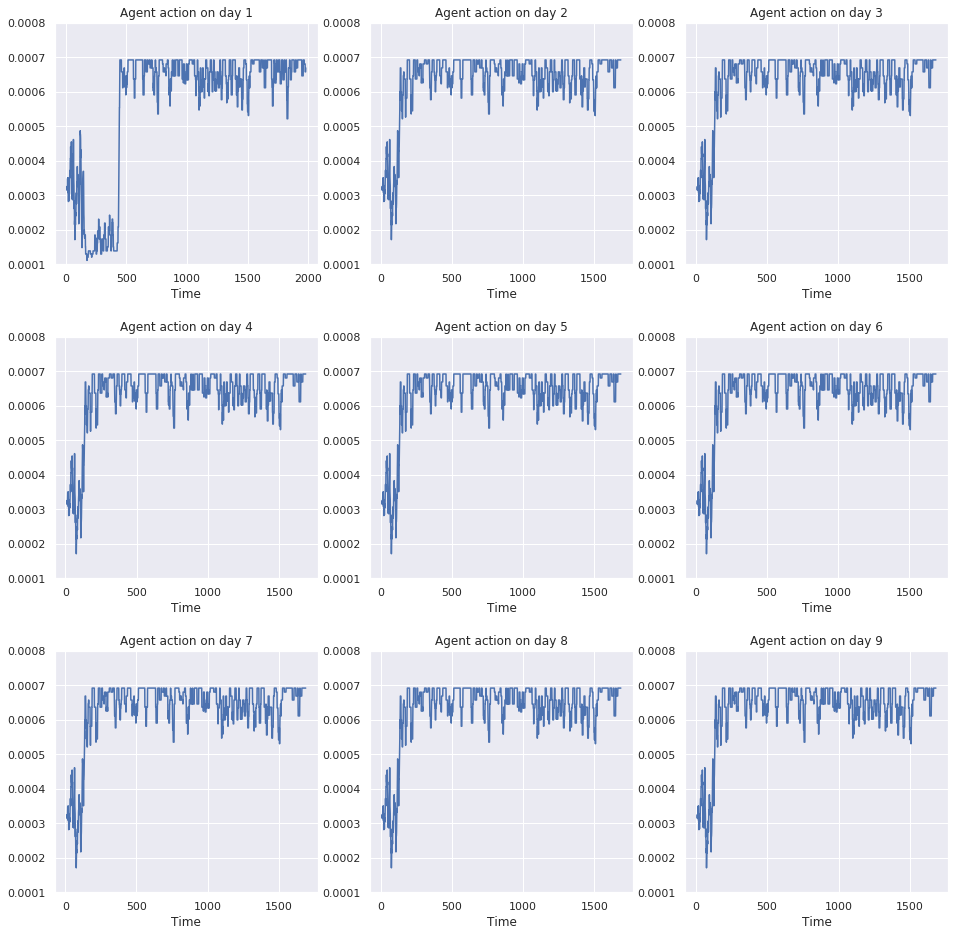

In [3]:
roll = 12
train = True

for key in ['agent_price_path', 'agent_cost_hist', 'agent_step_reward_hist', 'agent_action_hist']:
    fig, ax = plt.subplots(figsize=(16, 16), nrows=3, ncols=3)
    for ind, day in enumerate(days):
        ax[ind // 3, ind % 3].set_xlabel("Time")
        if key == 'agent_action_hist':
            ax[ind // 3, ind % 3].plot(stats[day][key].rolling(roll).mean())
            ax[ind // 3, ind % 3].set_ylim(0.0001, 0.0008)
            ax[ind // 3, ind % 3].set_title("Agent action on day {}".format(ind + 1))
        elif key == 'agent_cost_hist' and train:
            ax[ind // 3, ind % 3].plot(stats[day][key].rolling(roll).mean())
            ax[ind // 3, ind % 3].set_title("Agent training cost on day {}".format(ind + 1))
            if ind == 0:
                ax[ind // 3, ind % 3].set_ylim(0, 10)
            elif ind == 2:
                ax[ind // 3, ind % 3].set_ylim(0, 20)
        elif key != 'agent_cost_hist':
            ax[ind // 3, ind % 3].plot(stats[day][key].rolling(roll).mean())
            if key == 'agent_price_path':
                ax[ind // 3, ind % 3].set_title("Price path on day {}".format(ind + 1))
            else:
                ax[ind // 3, ind % 3].set_title("Agent reward on day {}".format(ind + 1))
    
    plt.subplots_adjust(hspace=0.3)
    plt.show()